In [1]:
import pandas as pd

In [6]:
df=pd.read_csv("VK100.csv")
df.head()

,Number,Format,Inning,Position,Score,Balls,Strike Rate,Against,Venue,Host Nation,Series,Year,Team Total,Wickets lost,Not Out,MOTM,Win,Captain
0,1,ODI,2,4,107,114,93.859649,Sri Lanka,Kolkata,India,Bilateral,2009,316,3,No,No,Yes,No
1,2,ODI,2,3,102,95,107.368421,Bangladesh,Mirpur,Bangladesh,Tri-Series,2010,249,4,Yes,Yes,Yes,No
2,3,ODI,2,3,118,121,97.520661,Australia,Vizag,India,Bilateral,2010,292,5,No,Yes,Yes,No
3,4,ODI,1,3,105,104,100.961539,New Zealand,Guwahati,India,Bilateral,2010,276,10,No,Yes,Yes,No
4,5,ODI,1,4,100,83,120.481928,Bangladesh,Mirpur,Bangladesh,World Cup,2011,370,4,Yes,No,Yes,No


In [7]:
from matplotlib import pyplot as plt

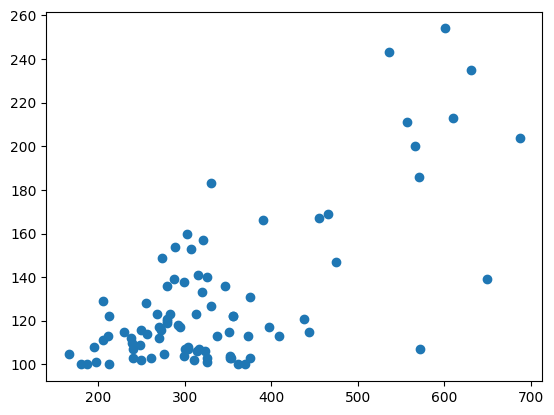

In [13]:
plt.scatter(df['Team Total'],df['Score'])

In [17]:
from sklearn.cluster import KMeans

In [27]:
km=KMeans(n_clusters=5)
km

KMeans(n_clusters=5)

In [28]:
y_predicted=km.fit_predict(df[['Team Total','Score']])

c:\Users\skart\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [29]:
df['cluster']=y_predicted

In [30]:
df.head()

,Number,Format,Inning,Position,Score,Balls,Strike Rate,Against,Venue,Host Nation,Series,Year,Team Total,Wickets lost,Not Out,MOTM,Win,Captain,cluster
0,1,ODI,2,4,107,114,93.859649,Sri Lanka,Kolkata,India,Bilateral,2009,316,3,No,No,Yes,No,4
1,2,ODI,2,3,102,95,107.368421,Bangladesh,Mirpur,Bangladesh,Tri-Series,2010,249,4,Yes,Yes,Yes,No,1
2,3,ODI,2,3,118,121,97.520661,Australia,Vizag,India,Bilateral,2010,292,5,No,Yes,Yes,No,4
3,4,ODI,1,3,105,104,100.961539,New Zealand,Guwahati,India,Bilateral,2010,276,10,No,Yes,Yes,No,4
4,5,ODI,1,4,100,83,120.481928,Bangladesh,Mirpur,Bangladesh,World Cup,2011,370,4,Yes,No,Yes,No,0


In [33]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]
df5=df[df.cluster==4]

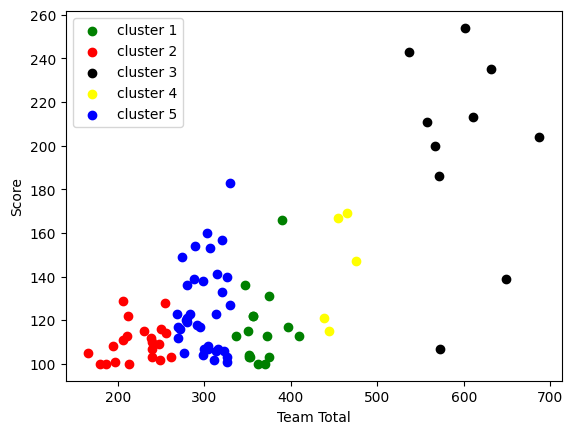

In [38]:
plt.scatter(df1['Team Total'],df1['Score'],label='cluster 1',color='green')
plt.scatter(df2['Team Total'],df2['Score'],color='red',label='cluster 2')
plt.scatter(df3['Team Total'],df3['Score'],color='black',label='cluster 3')
plt.scatter(df4['Team Total'],df4['Score'],color='yellow',label='cluster 4')
plt.scatter(df5['Team Total'],df5['Score'],color='blue',label='cluster 5')

plt.xlabel('Team Total')
plt.ylabel('Score')
plt.legend()

In [39]:
km.cluster_centers_

array([[365.9375    , 116.3125    ],
       [222.80952381, 109.9047619 ],
       [598.        , 199.2       ],
       [455.4       , 143.8       ],
       [299.51428571, 125.        ]])

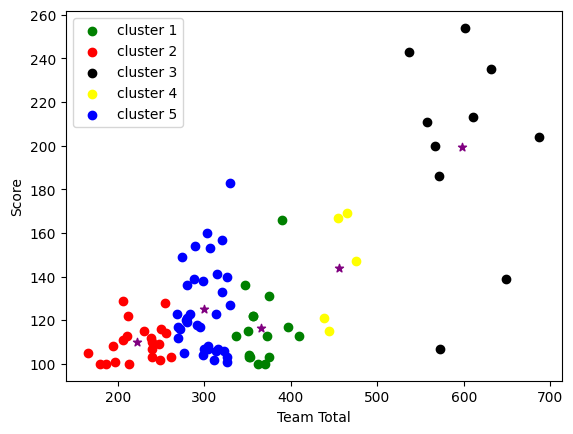

In [40]:
plt.scatter(df1['Team Total'],df1['Score'],label='cluster 1',color='green')
plt.scatter(df2['Team Total'],df2['Score'],color='red',label='cluster 2')
plt.scatter(df3['Team Total'],df3['Score'],color='black',label='cluster 3')
plt.scatter(df4['Team Total'],df4['Score'],color='yellow',label='cluster 4')
plt.scatter(df5['Team Total'],df5['Score'],color='blue',label='cluster 5')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*')

plt.xlabel('Team Total')
plt.ylabel('Score')
plt.legend()